# US Flights Analysis
### Arun Leo Prakash
#### 18-Aug-2019

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
Preliminary Wrangling
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
Exploration
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
</ul>


<a id='intro'></a>
### Introduction
> This analysis on US Flights uses dataset from http://stat-computing.org. This dataset reports flights in the United States, including
carriers, arrival and departure delays, and reasons for delays,
from 1987 to 2008. In the next section preliminary wrangling will be performed to understand the data and define the scope of this analysis.

### Preliminary Wrangling
> In this section 2008 data will be assessed, supplement data (airport, carrier & plane details) as well is assessed in this section.

<a id='gather'></a>
### Gather Data

In [1]:
# import all packages and set plots to be embedded inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

base_color = sb.color_palette()[0]

In [2]:
from io import BytesIO
#from zipfile import ZipFile
import bz2
from os import path, getcwd, makedirs, listdir 
from requests import get

##copy_data_from_url 
##This method accepts year for which the data has to be loaded and the folder where the csv file needs to be generated
def copy_data_from_url(p_year, p_folder):
    data_url = 'http://stat-computing.org/dataexpo/2009/'+p_year+'.csv.bz2'
    
    print(data_url)
    
    response = get(data_url)
    
    #Writing the contents to local path, followed by loading the file contents to 
    f_name = p_folder + '/'+p_year+'.csv.bz2'
    
    print(f_name)
    
    with open(f_name, mode='wb') as file:
        file.write(response.content)
    
    zipfile = bz2.BZ2File(f_name) # open the file
    data = zipfile.read() # get the decompressed data
    
    newfilepath = f_name[:-4] # assuming the filepath ends with .bz2
    
    open(newfilepath, 'wb').write(data) # write a uncompressed file
    
    zipfile.close() 
    
    print('files copied '+p_year)

In [1]:
#df_2004 = copy_data_from_url('2004', 'data')
#df_2005 = copy_data_from_url('2005', 'data')
#df_2006 = copy_data_from_url('2006', 'data')
#df_2007 = copy_data_from_url('2007', 'data')
df_2008 = copy_data_from_url('2008', 'data')

In [3]:
#load the csv file to data frame
df_2008 = pd.read_csv('data/2008.csv')

<a id='assess'></a>
### Assess data

In [4]:
print(df_2008.head(10))
print(df_2008.info())

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4    926.0         930   1054.0   
4  2008      1           3          4   1829.0        1755   1959.0   
5  2008      1           3          4   1940.0        1915   2121.0   
6  2008      1           3          4   1937.0        1830   2037.0   
7  2008      1           3          4   1039.0        1040   1132.0   
8  2008      1           3          4    617.0         615    652.0   
9  2008      1           3          4   1620.0        1620   1639.0   

   CRSArrTime UniqueCarrier  FlightNum        ...         TaxiIn  TaxiOut  \
0        2225            WN        335        ...            4.0      8.0   
1        1000            WN       3231        ...            5.0

#### Supplement Data

In [5]:
#Loading Airport data
df_airport = pd.read_csv('data/airports.csv')
print(df_airport.head(10))
print(df_airport.info())

  iata               airport              city state country        lat  \
0  00M              Thigpen        Bay Springs    MS     USA  31.953765   
1  00R  Livingston Municipal        Livingston    TX     USA  30.685861   
2  00V           Meadow Lake  Colorado Springs    CO     USA  38.945749   
3  01G          Perry-Warsaw             Perry    NY     USA  42.741347   
4  01J      Hilliard Airpark          Hilliard    FL     USA  30.688012   
5  01M     Tishomingo County           Belmont    MS     USA  34.491667   
6  02A           Gragg-Wade            Clanton    AL     USA  32.850487   
7  02C               Capitol        Brookfield    WI     USA  43.087510   
8  02G     Columbiana County    East Liverpool    OH     USA  40.673313   
9  03D      Memphis Memorial           Memphis    MO     USA  40.447259   

         long  
0  -89.234505  
1  -95.017928  
2 -104.569893  
3  -78.052081  
4  -81.905944  
5  -88.201111  
6  -86.611453  
7  -88.177869  
8  -80.641406  
9  -92.226961 

In [6]:
#Loading Carrier data
df_carrier = pd.read_csv('data/carriers.csv')
print(df_carrier.head(10))
print(df_carrier.info())

  Code                                   Description
0  02Q                                 Titan Airways
1  04Q                            Tradewind Aviation
2  05Q                           Comlux Aviation, AG
3  06Q                 Master Top Linhas Aereas Ltd.
4  07Q                           Flair Airlines Ltd.
5  09Q                                Swift Air, LLC
6  0BQ                                           DCA
7  0CQ                          ACM AIR CHARTER GmbH
8  0FQ          Maine Aviation Aircraft Charter, LLC
9  0GQ  Inter Island Airways, d/b/a Inter Island Air
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
Code           1490 non-null object
Description    1491 non-null object
dtypes: object(2)
memory usage: 23.4+ KB
None


In [8]:
#Loading plane data (this has the details about the aircraft)
df_plane = pd.read_csv('data/plane-data.csv')
print(df_plane.head(10))
print(df_plane.info())

  tailnum type manufacturer issue_date model status aircraft_type engine_type  \
0  N050AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
1  N051AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
2  N052AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
3  N054AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
4  N055AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
5  N056AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
6  N057AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
7  N058AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
8  N059AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   
9  N060AA  NaN          NaN        NaN   NaN    NaN           NaN         NaN   

  year  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
5  NaN  
6  NaN  
7  NaN  
8  NaN  
9  NaN  
<class 'p

In [9]:
df_2008.shape

(7009728, 29)

<a id='clean'></a>
### Cleaning Data

**Loading the supplement data and perform the cleanup**

In [10]:
df_carrier_clean = df_carrier.copy()
df_carrier_clean = df_carrier_clean.rename(columns={'Code' : 'UniqueCarrier', 'Description':'Carrier'})

#Long name fix - America west airlines had a long text that was briefing about 
#the merge details which was not useful but impacted the report output
df_carrier_clean.set_value(df_carrier_clean.query("UniqueCarrier == 'HP'").index, 'Carrier', 'America West Airlines Inc.')
df_carrier_clean.set_value(df_carrier_clean.query("UniqueCarrier == 'US'").index, 'Carrier', 'US Airways Inc.')

df_plane_clean = df_plane.rename(columns={'tailnum': 'TailNum', 'manufacturer' : 'Manufacturer', 
                                          'year' : 'Mfg_year', 'model' : 'Aircraft_model'})


## MCDONNELL DOUGLAS had multipe description which is fixed below
df_plane_clean.set_value(df_plane_clean.query("Manufacturer == 'DOUGLAS' | Manufacturer == 'MCDONNELL DOUGLAS CORPORATION' | Manufacturer == 'MCDONNELL DOUGLAS AIRCRAFT CO'").index, 'Manufacturer', 'MCDONNELL DOUGLAS')

## AIRBUS had multipe description which is fixed below
df_plane_clean.set_value(df_plane_clean.query("Manufacturer == 'AIRBUS INDUSTRIE'").index, 'Manufacturer', 'AIRBUS')

## Through multiple iterations it was found that the below manufacturer flights are operated in majority for the US region
## This analysis will be performed for this top 6 manufacturer flights
df_plane_clean = df_plane_clean.query("Manufacturer == 'BOEING' | Manufacturer == 'BOMBARDIER INC' | Manufacturer == 'EMBRAER' | " \
                     "Manufacturer == 'MCDONNELL DOUGLAS' | Manufacturer == 'AIRBUS' | Manufacturer == 'CANADAIR'")

##Plane columns that are not used for this analysis will be removed
df_plane_clean.drop('type', axis=1, inplace=True)
df_plane_clean.drop('issue_date', axis=1, inplace=True)
df_plane_clean.drop('status', axis=1, inplace=True)
df_plane_clean.drop('engine_type', axis=1, inplace=True)
df_plane_clean.drop('aircraft_type', axis=1, inplace=True)

#Airport data - we need only the iata and city as we are interested our analysis at city level
df_airport_clean = df_airport[['iata', 'city']]

#Copy of airport created twice, one for Origin and the next for destination
df_dest = df_airport_clean.copy()
df_origin = df_airport_clean.copy()

#Renaming columns for easy merge
df_dest = df_dest.rename(columns={'iata' : 'Dest', 'city':'DestCity'})
df_origin = df_origin.rename(columns={'iata' : 'Origin', 'city':'OriginCity'})


C:\Users\aantonys\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\aantonys\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\aantonys\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\aantonys\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [11]:
##Validate if the long name is fixed
print(df_carrier_clean.query("UniqueCarrier == 'HP'"))
print(df_carrier_clean.query("UniqueCarrier == 'US'"))


    UniqueCarrier                     Carrier
642            HP  America West Airlines Inc.
     UniqueCarrier          Carrier
1308            US  US Airways Inc.


**Merge the Flight data along with supplement data. Add transformations for reports**

In [12]:
##create a new copy of the data set for performing cleanup operations
##Add origin city and destination city from airport data
df_2008_clean = df_2008.merge(df_origin)
df_2008_clean = df_2008_clean.merge(df_dest)

##Add carrier name using code ref
df_2008_clean = df_2008_clean.merge(df_carrier_clean, on=('UniqueCarrier'))

##Using tailnum collect Manufacturer, year, Engine Type
df_2008_clean = df_2008_clean.merge(df_plane_clean, on='TailNum')

##Replacing missing values to current year to avoid conversion failures
df_2008_clean['Mfg_year'] = df_2008_clean['Mfg_year'].replace(to_replace =["0000", "None"], value ="2008")
##Aircraft age is added for performing delay analysis by age of the aircraft
df_2008_clean['Aircraft_age'] = 2008 - df_2008_clean['Mfg_year'].astype(int)

##Day of the week index to Day for easy reporting
weekday = ['Zero', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_2008_clean['Day'] = df_2008_clean['DayOfWeek'].apply(lambda x : weekday[x])

##Prefix 0 for months in single digit ie. Month 1 (Jan) to 01
df_2008_clean['Month'] = df_2008_clean['Month'].apply(lambda x: '{0:0>2}'.format(x))
df_2008_clean['DepHour'] = (df_2008_clean['CRSDepTime'] / 100).astype(int)

##Add a new column period in this format yyyy-mm
df_2008_clean['Period'] = '2008-'+df_2008_clean['Month']

**Drop unused columns**

In [13]:
## Drop unused columns

df_2008_clean.drop('DayofMonth', axis=1, inplace=True)
df_2008_clean.drop('DepTime', axis=1, inplace = True)
df_2008_clean.drop('ArrTime', axis=1, inplace = True)
df_2008_clean.drop('Origin', axis=1, inplace = True)
df_2008_clean.drop('Dest', axis=1, inplace = True)
df_2008_clean.drop('TaxiIn', axis=1, inplace = True)
df_2008_clean.drop('TaxiOut', axis=1, inplace = True)
df_2008_clean.drop('Year', axis=1, inplace = True)
df_2008_clean.drop('UniqueCarrier', axis=1, inplace = True)
df_2008_clean.drop('TailNum', axis=1, inplace = True)
df_2008_clean.drop('Month', axis=1, inplace = True)



In [14]:
###Cleanup 
## store it in a csv file
df_2008_cancel = df_2008_clean.query('Cancelled == 1')
df_2008_cancel.drop('Diverted', axis=1, inplace = True)
df_2008_cancel.drop('CarrierDelay', axis=1, inplace = True)
df_2008_cancel.drop('WeatherDelay', axis=1, inplace = True)
df_2008_cancel.drop('NASDelay', axis=1, inplace = True)
df_2008_cancel.drop('SecurityDelay', axis=1, inplace = True)
df_2008_cancel.drop('LateAircraftDelay', axis=1, inplace = True)
df_2008_cancel.drop('Cancelled', axis=1, inplace = True)
#df_2008_cancel.to_csv('df_2008_cancel.csv')

cancel_abbrev = {'A' : 'Carrier',
            'B' : 'Weather',
            'C' : 'NAS',
            'D' : 'Security',
            'E' : 'LateAircraft'}

df_2008_cancel['CancelCode'] = df_2008_cancel['CancellationCode'].apply(lambda x : cancel_abbrev[x])

df_2008_delays = df_2008_clean.query('CarrierDelay > 0 | WeatherDelay > 0 | NASDelay > 0 | SecurityDelay > 0 | LateAircraftDelay > 0')
df_2008_delays.drop('Cancelled', axis=1, inplace = True)
#df_2008_delays.to_csv('df_2008_delays.csv')

df_2008_clean = df_2008_clean.query('Diverted == 0 & Cancelled == 0')
#Cancellation and delay related columns are not relevant for this df
df_2008_clean.drop('Cancelled', axis=1, inplace = True)
df_2008_clean.drop('CancellationCode', axis=1, inplace = True)
df_2008_clean.drop('Diverted', axis=1, inplace = True)
df_2008_clean.drop('CarrierDelay', axis=1, inplace = True)
df_2008_clean.drop('WeatherDelay', axis=1, inplace = True)
df_2008_clean.drop('NASDelay', axis=1, inplace = True)
df_2008_clean.drop('SecurityDelay', axis=1, inplace = True)
df_2008_clean.drop('LateAircraftDelay', axis=1, inplace = True)

#df_2008_clean.to_csv('df_2008_clean.csv')


C:\Users\aantonys\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\aantonys\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Boxplots to identify outliers**

**AirTime**

664.0

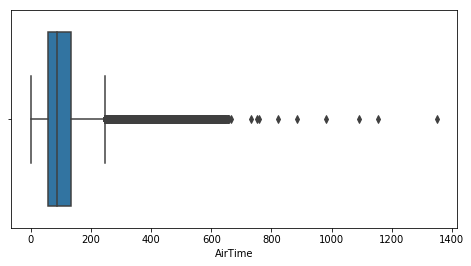

In [15]:
# code for the AirTime boxplot
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]

sb.boxplot(data=df_2008_clean, x='AirTime', color=base_color);

df_2008_clean.query('Distance > 4960')['AirTime'].max()#[['Distance', 'OriginCity', 'DestCity', 'AirTime']]

**Outliers on AirTime is clearly visible, lets clean up the outliers out of the report**

In [16]:
##Removing outliers on AirTime which is above 670 
df_2008_clean = df_2008_clean.query('AirTime <= 670')

In [17]:
#Validate if cleanup was successful
df_2008_clean.AirTime.max()

664.0

**Distance**

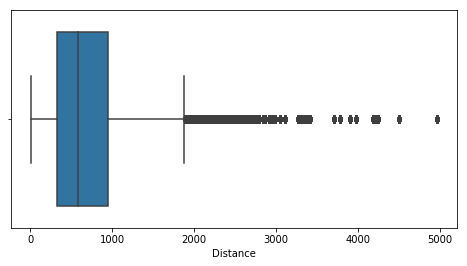

In [18]:
# code for the Distance boxplot
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]

sb.boxplot(data=df_2008_clean, x='Distance', color=base_color);

**The outliers were not removed as they were valid distance flights from US Cities to Honolulu**

**Aircraft Age**

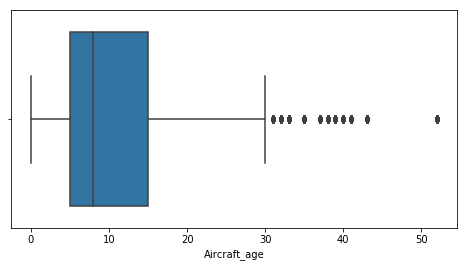

In [19]:
# code for the Aircraft age boxplot
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]

sb.boxplot(data=df_2008_clean, x='Aircraft_age', color=base_color);

**The outliers found above were the 224 MCDONNELL DOUGLAS flights with manufacturing year 1956 which is not valid. The company itself is established in 1967 and hence will be removed**

In [20]:
df_2008_clean = df_2008_clean[df_2008_clean['Aircraft_age'] < 50]

In [21]:
df_2008_clean[df_2008_clean['Aircraft_age'] > 50]

Empty DataFrame
Columns: [DayOfWeek, CRSDepTime, CRSArrTime, FlightNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Distance, OriginCity, DestCity, Carrier, Manufacturer, Aircraft_model, Mfg_year, Aircraft_age, Day, DepHour, Period]
Index: []

In [22]:
print(df_2008_delays.info())
print(df_2008_clean.info())
print(df_2008_cancel.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330259 entries, 2 to 6059456
Data columns (total 27 columns):
DayOfWeek            1330259 non-null int64
CRSDepTime           1330259 non-null int64
CRSArrTime           1330259 non-null int64
FlightNum            1330259 non-null int64
ActualElapsedTime    1330259 non-null float64
CRSElapsedTime       1330259 non-null float64
AirTime              1330259 non-null float64
ArrDelay             1330259 non-null float64
DepDelay             1330259 non-null float64
Distance             1330259 non-null int64
CancellationCode     0 non-null object
Diverted             1330259 non-null int64
CarrierDelay         1330259 non-null float64
WeatherDelay         1330259 non-null float64
NASDelay             1330259 non-null float64
SecurityDelay        1330259 non-null float64
LateAircraftDelay    1330259 non-null float64
OriginCity           1329782 non-null object
DestCity             1329729 non-null object
Carrier              1330259 non-n

### What is the structure of your dataset?

> Flight Data (2008) : There are 7009728 flight entries for the year 2008 and there are 29 columns with various inputs. The inputs includes the date, flight number, origin, destination, departute & arrival time, distance, airtime, delay information, cancellation & flag that represents if its a diverted flight.

> Airport : There are 3375 entries out of 12 entries have missing information about city and state.

> Carriers : There are 1491 entries and 1 missing carrier code.

> Plane : There are 5029 entries and only 4480 has not null values which can be helpful.

> The final outcome after cleanup which will be further used in analysis is as follows
    1. df_2008_clean - This data frame would have all non-cancelled and non delays
    2. df_2008_cancel - This data frame would be having all cancelled flight details
    3. df_2008_delays - This data frame would be having all delayed flight details


### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding the preferred hour, day, month. Top carriers, flight models, destinations. Finding causes for cancellation & delays. Are there any carrier / month / flight model that has more cancellations / delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Cancellations & Codes will help to understand reasoning of cancellations. CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay gives classification of reasoning for flight delays. 
The supplement data is required to get some meaningful data like additional details other than just codes stored in the flight data. For example the flight data just has Origin and Destination codes which is just IATA code and aiport data has the details about the aiport name, city, state and country details.

<a id='univariate'></a>
## Univariate Exploration

> Monthly, Daily and Hourly Trends on Flights, Cancellations & Delays

In [40]:
#month_order = ['2008-01', '2008-02','2008-03', '2008-04','2008-05', '2008-06','2008-07', '2008-08','2008-09', '2008-10','2008-11', '2008-12'] 
#df_2008_clean.to_csv('df_2008_clean.csv')
df_2008_cancel.to_csv('df_2008_cancel.csv')
df_2008_delays.to_csv('df_2008_delays.csv')

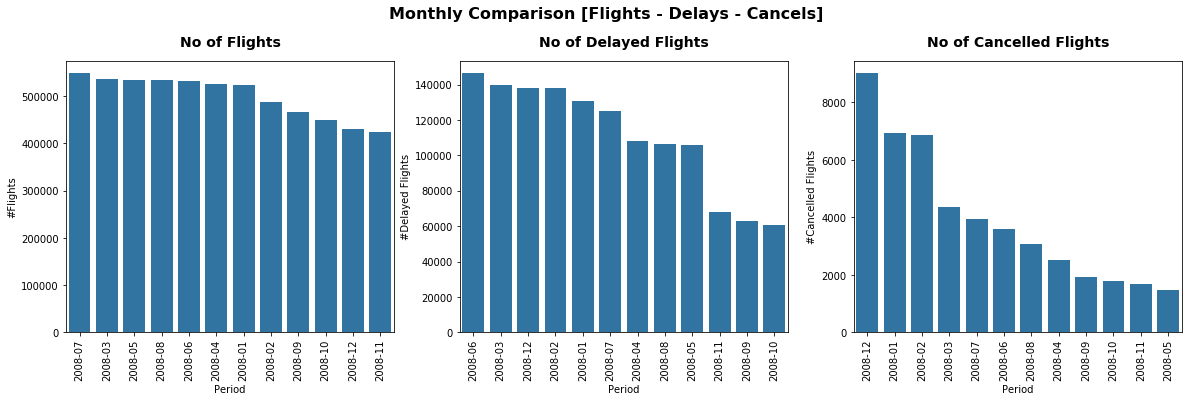

In [24]:
plt.figure(figsize = [20, 5]);
plt.suptitle('Monthly Comparison [Flights - Delays - Cancels]', y=1.03, fontsize=16, fontweight='semibold');

# code for the bar chart
plt.subplot(1, 3, 1);
g = sb.countplot(data=df_2008_clean, x="Period", order=df_2008_clean.Period.value_counts().index, 
                     color = base_color);
g.set_title('No of Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Period');
g.set_ylabel('#Flights');
plt.xticks(rotation=90);

plt.subplot(1, 3, 2);

g = sb.countplot(data=df_2008_delays, x="Period", order=df_2008_delays.Period.value_counts().index, 
                     color = base_color);
g.set_title('No of Delayed Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Period');
g.set_ylabel('#Delayed Flights');
plt.xticks(rotation=90);

# code for the pie chart
plt.subplot(1, 3, 3);
g = sb.countplot(data=df_2008_cancel, x="Period", order=df_2008_cancel.Period.value_counts().index, 
                     color = base_color);
g.set_title('No of Cancelled Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Period');
g.set_ylabel('#Cancelled Flights');
plt.xticks(rotation=90);

**The above report shows that the most no of flights were during July and the low no of flights were during and and this shows people preferred travelling more during summer in contrast on winter where the travel is lesser.**
1. Also the no of cancelled flight could be an indication that more flights are cancelled during winter. 
2. Delays were high during June and delay breakup report could give some hints on the cause


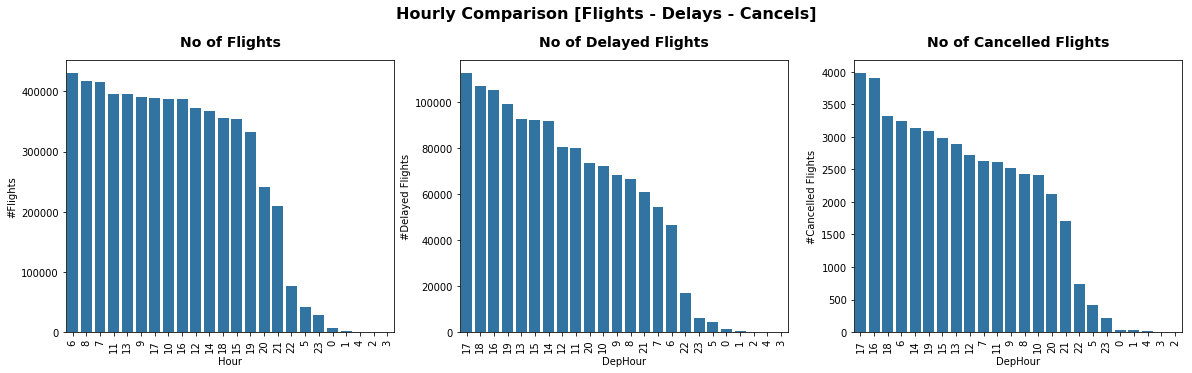

In [25]:
plt.figure(figsize = [20, 5]);
plt.suptitle('Hourly Comparison [Flights - Delays - Cancels]', y=1.03, fontsize=16, fontweight='semibold');

# code for the bar chart
plt.subplot(1, 3, 1);
g = sb.countplot(data=df_2008_clean, x="DepHour", order=df_2008_clean.DepHour.value_counts().index, color = base_color);
g.set_title('No of Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Hour');
g.set_ylabel('#Flights');
plt.xticks(rotation=90);

plt.subplot(1, 3, 2);

g = sb.countplot(data=df_2008_delays, x="DepHour", order=df_2008_delays.DepHour.value_counts().index, 
                     color = base_color);
g.set_title('No of Delayed Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('DepHour');
g.set_ylabel('#Delayed Flights');
plt.xticks(rotation=90);

# code for the pie chart
plt.subplot(1, 3, 3);
g = sb.countplot(data=df_2008_cancel, x="DepHour", order=df_2008_cancel.DepHour.value_counts().index, 
                     color = base_color);
g.set_title('No of Cancelled Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('DepHour');
g.set_ylabel('#Cancelled Flights');
plt.xticks(rotation=90);

**Findings**
1. 6, 7, 8 hours shows high number of flights that could be high number of regular commuters to office.
2. Delays and cancelled are experienced high during evening hours

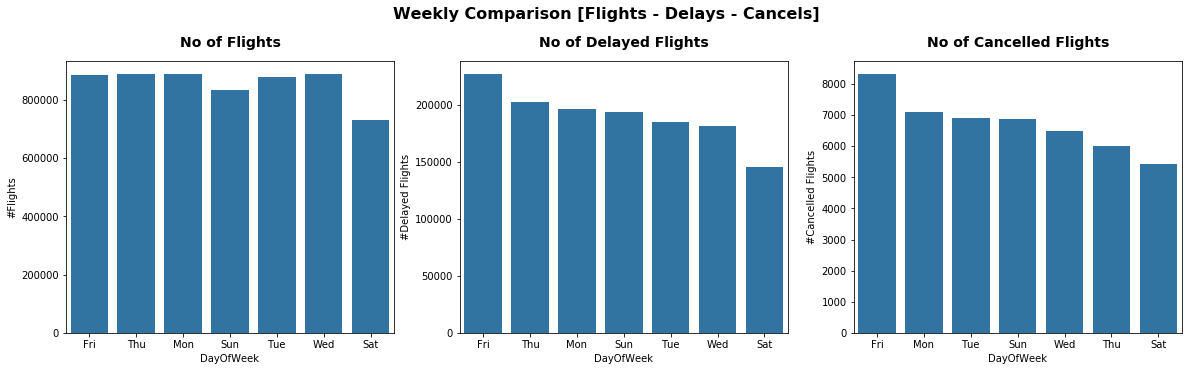

In [26]:
plt.figure(figsize = [20, 5]);
plt.suptitle('Weekly Comparison [Flights - Delays - Cancels]', y=1.03, fontsize=16, fontweight='semibold');

# code for the bar chart
plt.subplot(1, 3, 1);
g = sb.countplot(data=df_2008_clean, x="Day", order=df_2008_delays.Day.value_counts().index, 
                     color = base_color);
g.set_title('No of Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('DayOfWeek');
g.set_ylabel('#Flights');
#plt.xticks(rotation=90)

plt.subplot(1, 3, 2);

g = sb.countplot(data=df_2008_delays, x="Day", order=df_2008_delays.Day.value_counts().index, 
                     color = base_color);
g.set_title('No of Delayed Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('DayOfWeek');
g.set_ylabel('#Delayed Flights');
#plt.xticks(rotation=90)

# code for the pie chart
plt.subplot(1, 3, 3);
g = sb.countplot(data=df_2008_cancel, x="Day", order=df_2008_cancel.Day.value_counts().index, 
                     color = base_color);
g.set_title('No of Cancelled Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('DayOfWeek');
g.set_ylabel('#Cancelled Flights');
#plt.xticks(rotation=90)

**Weekly analysis findings**
1. Week days have more flights comparing to weekends.
2. Fridays had more cancellations and delays

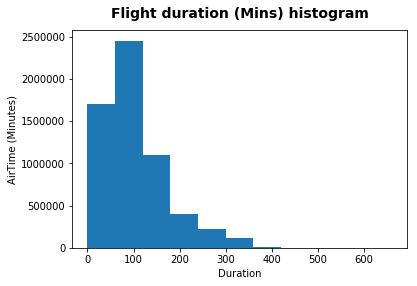

In [27]:
bin_edges = np.arange(0, 700,60)

plt.hist(data = df_2008_clean, x = 'AirTime', bins = bin_edges)
#plt.yscale()
plt.title("Flight duration (Mins) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration')
plt.ylabel('AirTime (Minutes)');

**The above histogram on AirTime (Right skewed) shows that majority of the flights were short flights below 2 hours.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. Flight Duration (AirTime) : Outliers found and removed
2. Distance : No Outliers
3. Delays (Weather, Carrier, etc) : No Outliers Found

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. AirTime had outliers (beyond 660 minutes) which was unusual, it was less than 5%. Also I have observed Flights to and from Honolu had the max AirTime of around 11 hours with max distance of 4700 Miles. I have removed those of AirTime beyond 670 minutes.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [28]:
df_2008_clean_mfg = df_2008_clean.groupby('Manufacturer')['FlightNum'].count()
df_2008_clean_mfg = df_2008_clean_mfg.reset_index()

df_2008_clean_mfg = df_2008_clean_mfg.sort_values('FlightNum', ascending=False)

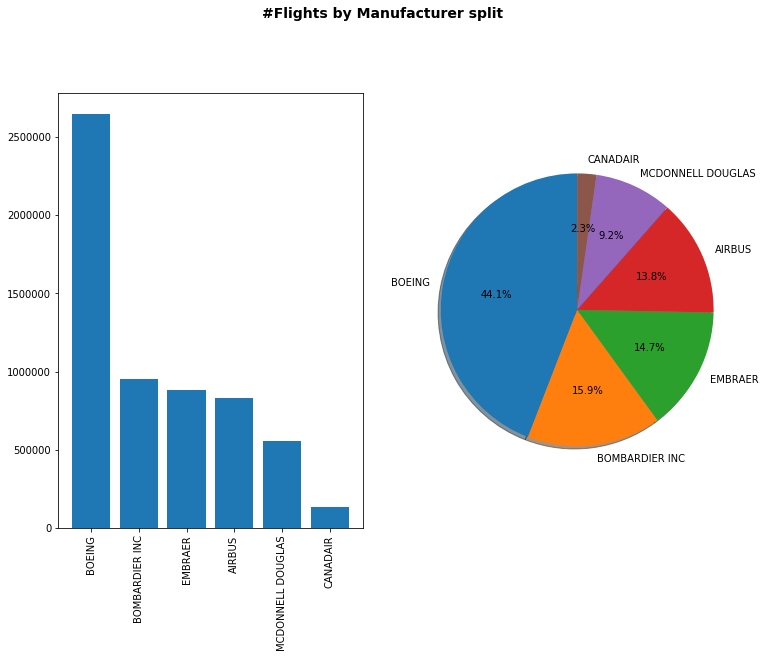

In [29]:
fig, ax = plt.subplots(figsize=(12, 8), nrows=1, ncols=2)

g1 = ax[0].bar(data=df_2008_clean_mfg, x='Manufacturer', height='FlightNum');

ax[0].tick_params(axis='x', rotation=90)

data = df_2008_clean_mfg['FlightNum']
label = df_2008_clean_mfg['Manufacturer']

g2= ax[1].pie(data, autopct='%1.1f%%', shadow=True, startangle=90, labels=label);
plt.axis('equal');
plt.suptitle('#Flights by Manufacturer split', y=1.03, fontsize=14, fontweight='semibold');

**Boeing leads with 44.1% of the flighs in US, followed by bombardier & Embraer in second and third positions**

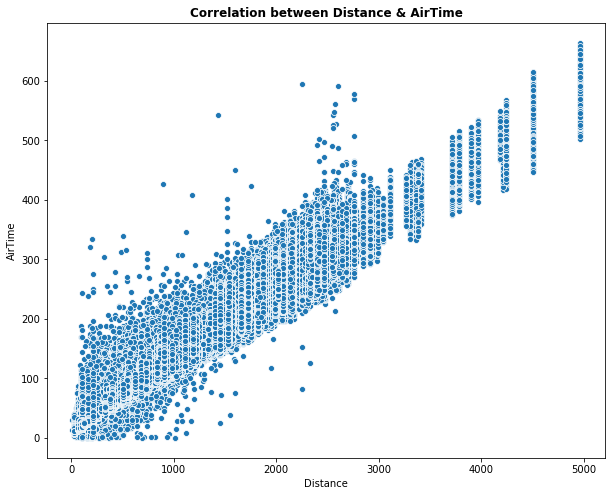

In [30]:
plt.subplots(figsize=(10,8))

sb.scatterplot(x = df_2008_clean['Distance'], y = df_2008_clean['AirTime']);
plt.title('Correlation between Distance & AirTime', fontsize=12, fontweight='bold');
plt.show();

**The above plot shows a strong correlation between Distance and the AirTime**

In [31]:
def plot_line_delays(v_cancelcode):
    
    cancel_desc = cancel_abbrev[v_cancelcode]    
    ####Delays by month
    df_delay_a = df_2008_delays.query(cancel_desc+'Delay > 0').groupby(['Period'])[cancel_desc+'Delay'].sum() / 60
    df_delay_a = df_delay_a.reset_index()
    
    x = df_delay_a[cancel_desc+'Delay']
    y = df_delay_a['Period']
    plt.plot(y, x, linestyle=':', marker='d');

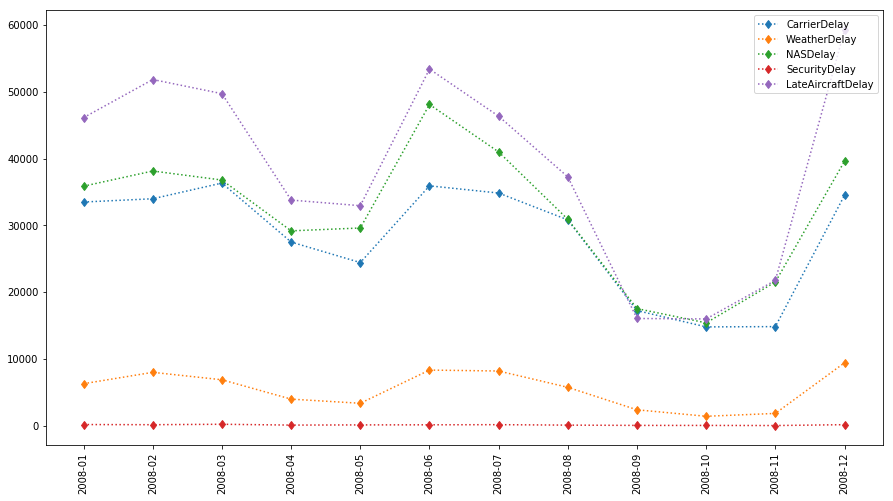

In [32]:
fig = plt.figure(figsize=(15,8));
plot_line_delays('A');
plot_line_delays('B');
plot_line_delays('C');
plot_line_delays('D');
plot_line_delays('E');
plt.legend();
plt.xticks(rotation=90);

**Highest delays are experienced in the month of Dec, Jan and Jun**

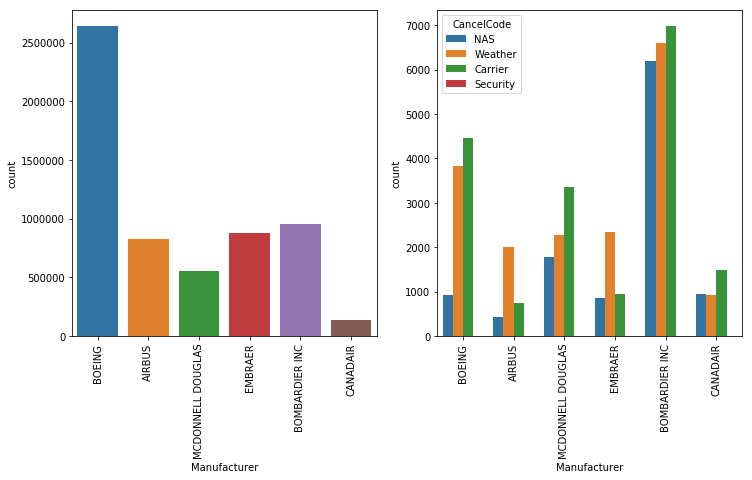

In [33]:
fig = plt.figure(figsize=(12,6));
plt.subplot(1, 2, 1);

sb.countplot(data = df_2008_clean, x = 'Manufacturer');
plt.xticks(rotation=90);

plt.subplot(1, 2, 2);

sb.countplot(data = df_2008_cancel, x = 'Manufacturer', hue = 'CancelCode');
plt.xticks(rotation=90);

**The above reports on manufacturer wise flights vs cancellations interestingly shows Bombardier & Boeing has reverse on no of flights vs cancellations though Boeing had the highest no of flights**

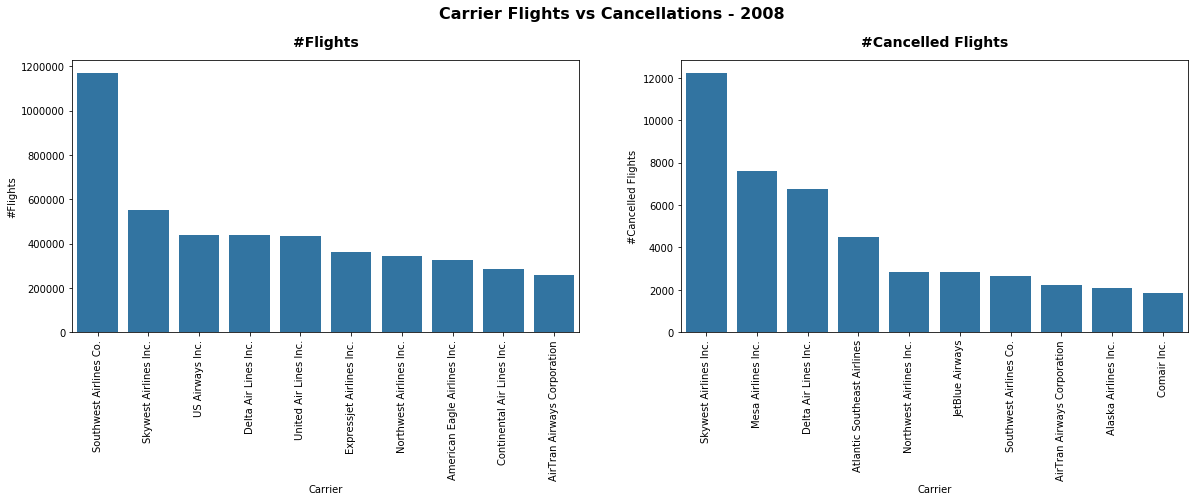

In [34]:
plt.figure(figsize = [20, 5]);
plt.suptitle('Carrier Flights vs Cancellations - 2008', y=1.03, fontsize=16, fontweight='semibold');

# code for the bar chart
df_flights = df_2008_clean.groupby(['Carrier'])['FlightNum'].count()
df_flights = df_flights.reset_index()
df_flights = df_flights.rename(columns={'FlightNum':'Count'})
df_flights = df_flights.sort_values('Count', ascending=False).head(10)

plt.subplot(1, 2, 1);
g = sb.barplot(data=df_flights, x="Carrier", y='Count', color=base_color);
g.set_title('#Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Carrier');
g.set_ylabel('#Flights');
plt.xticks(rotation=90);


df_top_cancellations = df_2008_cancel.groupby(['Carrier'])['FlightNum'].count()
df_top_cancellations = df_top_cancellations.reset_index()
df_top_cancellations = df_top_cancellations.rename(columns={'FlightNum':'Count'})
df_top_cancellations = df_top_cancellations.sort_values('Count', ascending=False).head(10)

plt.subplot(1, 2, 2);
g = sb.barplot(data=df_top_cancellations, x="Carrier", y='Count', color=base_color);
g.set_title('#Cancelled Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Carrier');
g.set_ylabel('#Cancelled Flights');
plt.xticks(rotation=90);


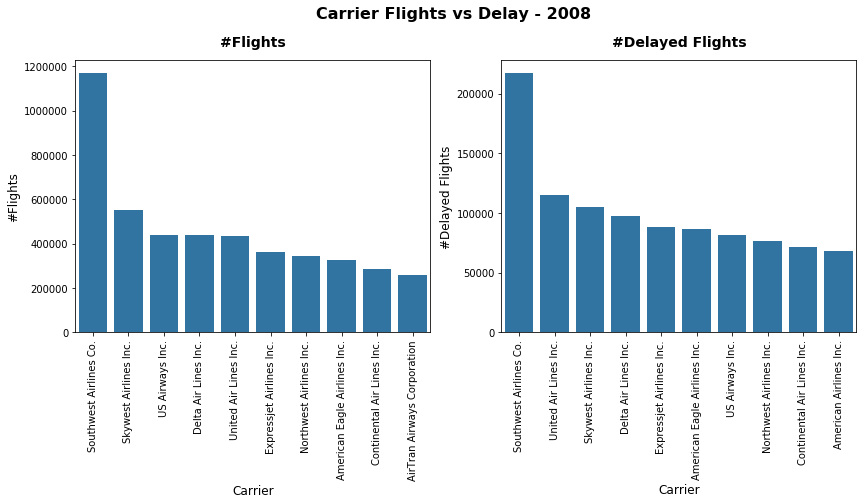

In [37]:
plt.figure(figsize = [14, 5]);
plt.suptitle('Carrier Flights vs Delay - 2008', y=1.03, fontsize=16, fontweight='semibold');

# code for the bar chart
df_flights = df_2008_clean.groupby(['Carrier'])['FlightNum'].count()
df_flights = df_flights.reset_index()
df_flights = df_flights.rename(columns={'FlightNum':'Count'})
df_flights = df_flights.sort_values('Count', ascending=False).head(10)

plt.subplot(1, 2, 1);
g = sb.barplot(data=df_flights, x="Carrier", y='Count', color=base_color);
g.set_title('#Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Carrier', fontsize=12);
g.set_ylabel('#Flights', fontsize=12);
plt.xticks(rotation=90);

plt.subplot(1, 2, 2);

df_top_delays = df_2008_delays.groupby(['Carrier'])['FlightNum'].count()
df_top_delays = df_top_delays.reset_index()
df_top_delays = df_top_delays.rename(columns={'FlightNum':'Count'})
df_top_delays = df_top_delays.sort_values('Count', ascending=False).head(10)

g = sb.barplot(data=df_top_delays, x="Carrier", y='Count', color=base_color);
g.set_title('#Delayed Flights', y=1.03, fontsize=14, fontweight='semibold');
g.set_xlabel('Carrier', fontsize=12);
g.set_ylabel('#Delayed Flights', fontsize=12);
plt.xticks(rotation=90);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 1. There is a strong relationship between AirTime vs Distance
 2. Delay graphs shows a similar flow between type of delays
 3. Interestingly Flights vs Cancellations by Manufacturer shows high flight count on Boeing but high cancel count on Bombardier which has very low counts in comparison with Boeing flights.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

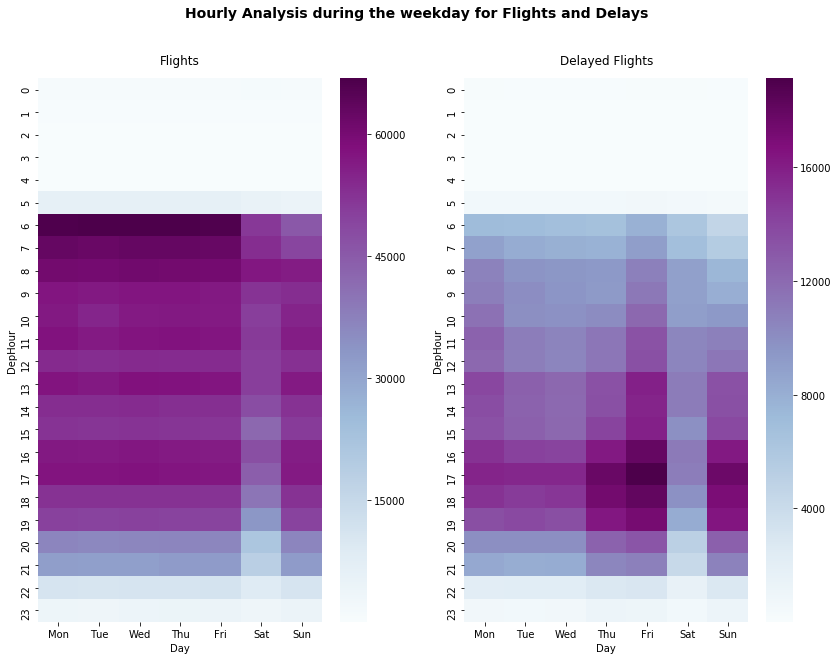

In [38]:
# Setting the weekday order
df_2008_clean['Day'] = pd.Categorical(df_2008_clean['Day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

df_2008_delays['Day'] = pd.Categorical(df_2008_delays['Day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

plt.figure(figsize=(14,10));
plt.suptitle('Hourly Analysis during the weekday for Flights and Delays', fontsize=14, fontweight='semibold');

# heatmap for Flights
plt.subplot(1, 2, 1);
df_flights = df_2008_clean.groupby(["DepHour", "Day"])["FlightNum"].size().reset_index();
df_flights = df_flights.pivot("DepHour", "Day", "FlightNum");
sb.heatmap(df_flights, cmap="BuPu");

plt.title("Flights", y=1.015);

# heatmap for delays
plt.subplot(1, 2, 2);
df_delayflights = df_2008_delays.groupby(["DepHour", "Day"])["FlightNum"].size().reset_index();
df_delayflights = df_delayflights.pivot("DepHour", "Day", "FlightNum");
sb.heatmap(df_delayflights, cmap="BuPu");

plt.title("Delayed Flights", y=1.015);

The plot perfectly summarizes in one place the different trends for flights and cancellations. 

Flights counts are less often on saturdays:
weekdays: most flights are between 6-8am very high on 6am and 4-5pm with the peak on Fridays around 5pm
weekends: most flights are on sundays at 8am, 1pm and between 4-5pm

Flight delays are high on Thursdays, Fridays and Sundays specially at 5pm on Fridays:

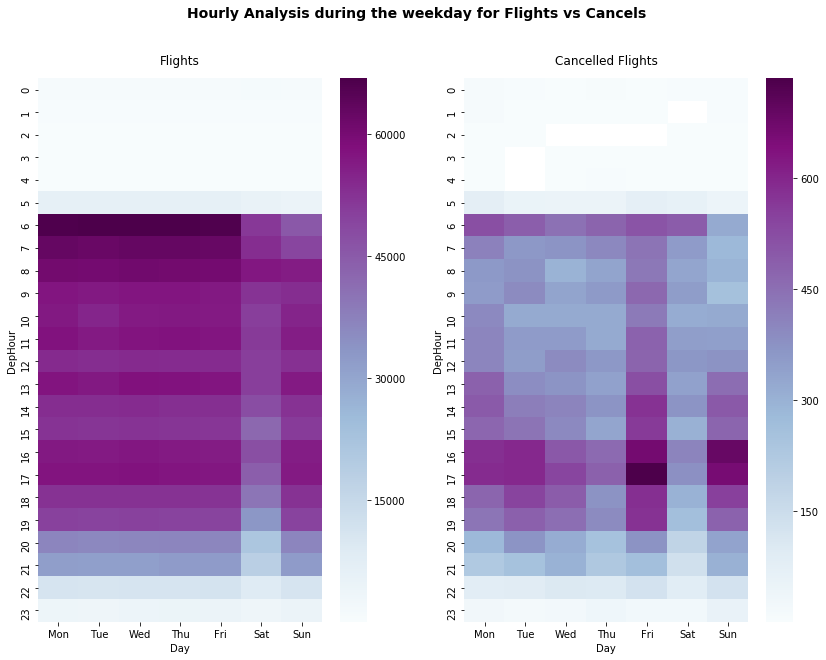

In [39]:
# Setting the weekday order
df_2008_clean['Day'] = pd.Categorical(df_2008_clean['Day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

df_2008_cancel['Day'] = pd.Categorical(df_2008_cancel['Day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

plt.figure(figsize=(14,10));
plt.suptitle('Hourly Analysis during the weekday for Flights vs Cancels', fontsize=14, fontweight='semibold')

# heatmap for Flights
plt.subplot(1, 2, 1);
df_flights = df_2008_clean.groupby(["DepHour", "Day"])["FlightNum"].size().reset_index();
df_flights = df_flights.pivot("DepHour", "Day", "FlightNum");
sb.heatmap(df_flights, cmap="BuPu");

plt.title("Flights", y=1.015);

# heatmap for delays
plt.subplot(1, 2, 2);
df_cancelflights = df_2008_cancel.groupby(["DepHour", "Day"])["FlightNum"].size().reset_index();
df_cancelflights = df_cancelflights.pivot("DepHour", "Day", "FlightNum");
sb.heatmap(df_cancelflights, cmap="BuPu");

plt.title("Cancelled Flights", y=1.015);

The plot perfectly summarizes in one place the different trends for flights and cancellations. 

Flights counts are less often on saturdays:
weekdays: most flights are between 6-8am very high on 6am and 4-5pm with the peak on Fridays around 5pm
weekends: most flights are on sundays at 8am, 1pm and between 4-5pm

Flight cancellations are high on Fridays and Sundays specially at 5pm on Fridays:

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 6, 7, 8 AM on weekdays is the highest no of flights, with no delays. 
  6 AM experiences a little high on cancellations, however it could be only during Dec, Jun & Jan.

### Were there any interesting or surprising interactions between features?

1. Friday has high cancellations and delays.
2. Manufacturer Boeing leads with 44% of the flights operated in US.
3. Carrier SouthWest Airlines operates high number of flights in U.S. with less cancellations